# Question 4

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import copy

> ### Negative Transform
>> The function *negativeTransform* gives the negative of an image
>>> Negative Transform maps 0 to 255 and 255 to 0. $$ NegativeImg = 255 - Img $$
> ### Gamma Transform
>> The function *gammaTransform* gives the gamma transformation of input image. Gamma Transform is given as 
$$ s = r^{\gamma} $$  
>>> The function first takes the input image then converts its range to (0-1), applies the gamma transform and then scales it upto the range (0-255).
> ### Piece-wise Transform
>> The function *pieceTransform* takes parameters $ a, b, K_1, and K_2 $ and implements the linear transform 
$$ g(z) = K_1 * z + K_2 \ \ \ where \ \ \ a <= z <= b $$

In [2]:
def gammaTransform(img, gamma):
    img = img.astype('float32')
    img = img/255
    return np.uint8(255*np.power(img, gamma))

In [3]:
def negativeTransform(img, maxIntensity):
    return np.uint8((255 - img.astype('float32'))*(maxIntensity/255))

In [4]:
def pieceTransform(img, k1, k2, a, b):
    mask = np.logical_and(img>=a, img<=b)
    return np.uint8(np.where(mask == True, k1*img + k2, img))
    

In [5]:
def imRange(num):
    return np.uint8(np.round(num*255))

In [6]:
def BitQuantizeImage(im, k):
    return np.uint8(np.round((np.right_shift(im.astype('int64'), 8 - k)*255)/(np.left_shift(1, k) - 1)))    
#     return np.left_shift(np.right_shift(im, 8 - k), 8 - k)

In [7]:
def showNegQuant(img):
    _, images = plt.subplots(4,2,figsize = (20,20))
    for i in range(8):
        images[i//2][i%2].imshow(negativeTransform(BitQuantizeImage(img, i+1), 255), cmap = 'gray', vmin = 0, vmax = 255)
        images[i//2][i%2].set_title("Negative BitQuantize " + str(i+1))
    plt.show()
        

In [8]:
im = cv.imread('./images/lena.jpg', cv.IMREAD_GRAYSCALE)

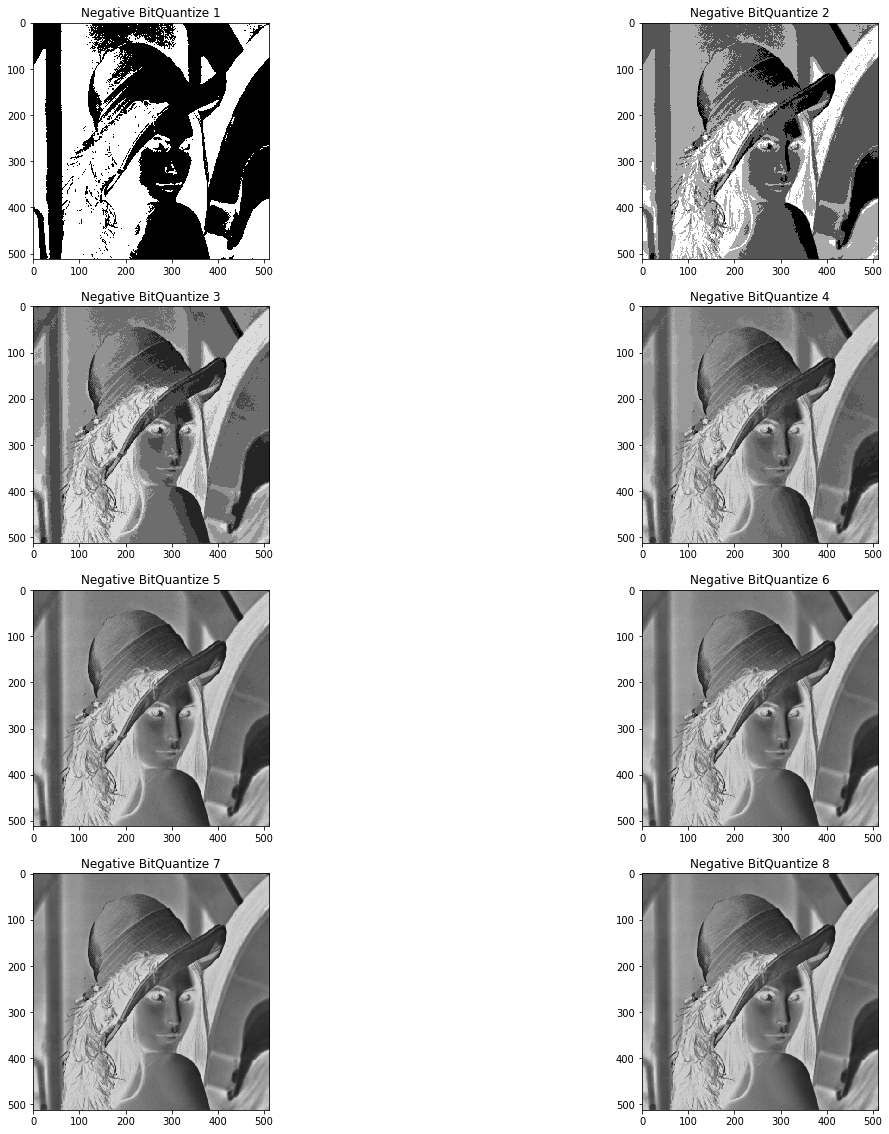

In [9]:
showNegQuant(im)

## Gamma Transform Observations

In [10]:
im = cv.imread('./images/gamma-corr.png', cv.IMREAD_GRAYSCALE)

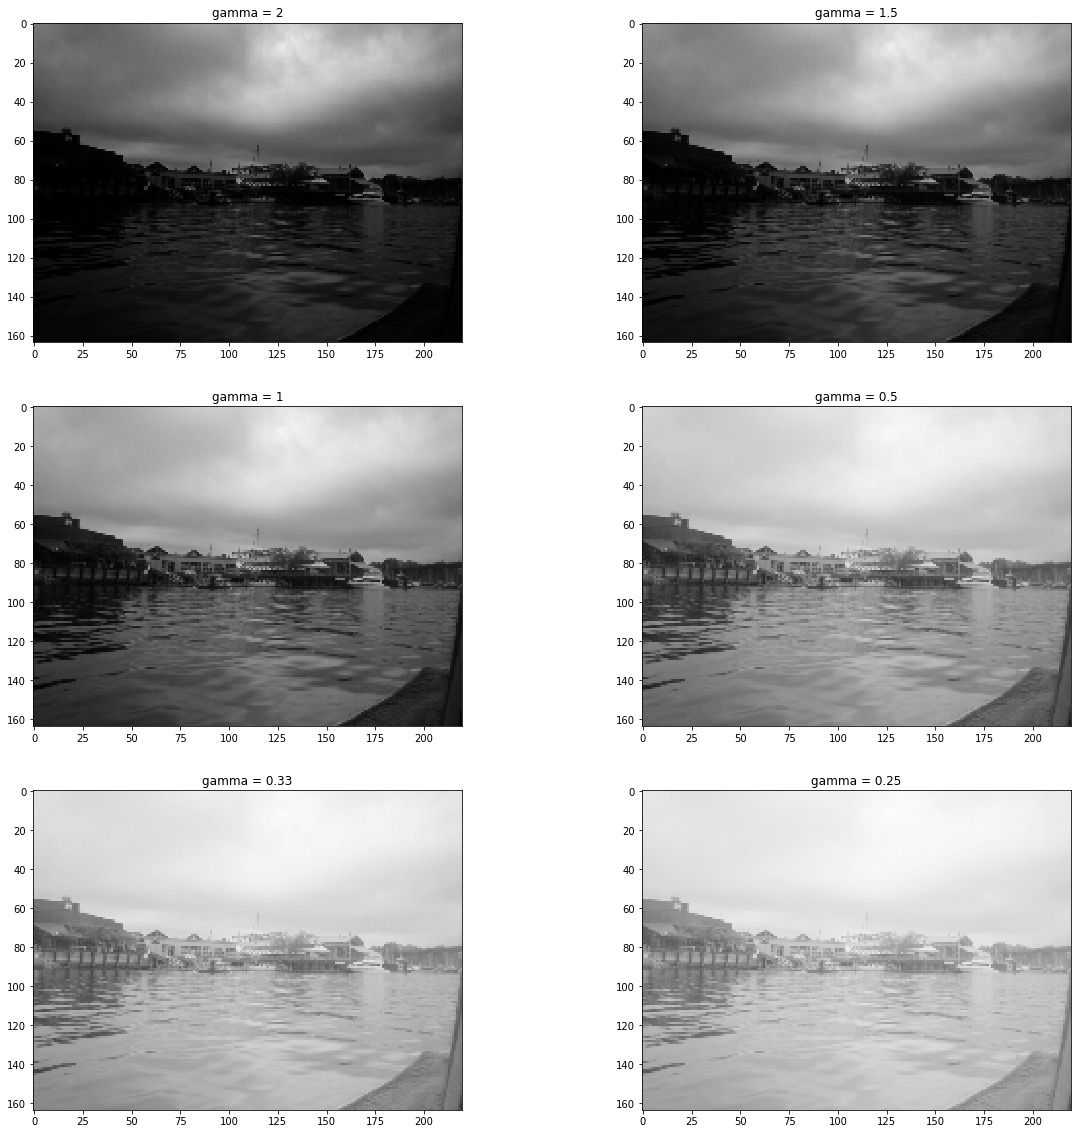

In [11]:
_, images = plt.subplots(3,2,figsize = (20,20))
images[0][0].imshow(gammaTransform(im, 2), cmap = 'gray', vmin = 0, vmax = 255)
images[0][0].set_title('gamma = 2')
images[0][1].imshow(gammaTransform(im, 1.5), cmap = 'gray', vmin = 0, vmax = 255)
images[0][1].set_title('gamma = 1.5')
images[1][0].imshow(gammaTransform(im, 1), cmap = 'gray', vmin = 0, vmax = 255)
images[1][0].set_title('gamma = 1')
images[1][1].imshow(gammaTransform(im, 0.5), cmap = 'gray', vmin = 0, vmax = 255)
images[1][1].set_title('gamma = 0.5')
images[2][0].imshow(gammaTransform(im, 0.33), cmap = 'gray', vmin = 0, vmax = 255)
images[2][0].set_title('gamma = 0.33')
images[2][1].imshow(gammaTransform(im, 0.25), cmap = 'gray', vmin = 0, vmax = 255)
images[2][1].set_title('gamma = 0.25')
plt.show()

> Gamma correction uses a non linear mapping. As gamma is increased (more than 1), the image gets darker and as gamma is decreased (less than 1), the image gets brighter. Although gamma correction uses non linear (exponentional) mapping our eyes perceive only a fraction of change in brightness for an exponential increase. 

# part 3.1

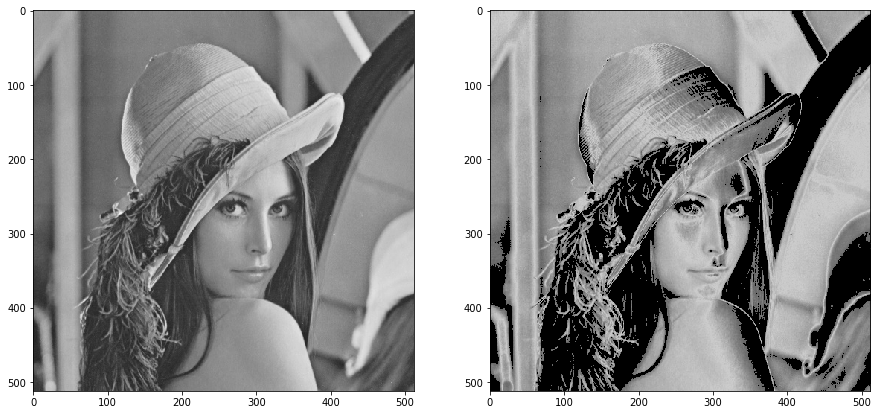

In [12]:
#graph-1
im = cv.imread('./images/lena.jpg', cv.IMREAD_GRAYSCALE)

res = np.empty(im.shape)
mask1 = pieceTransform(im, 0, 0, 0, imRange(0.3))
mask2 = pieceTransform(im, (4.0/3.0), 0, imRange(0.3), imRange(0.6))
mask3 = pieceTransform(im, -2, imRange(2), imRange(0.6), imRange(0.8))
mask4 = pieceTransform(im, 0, 0, imRange(0.8), 255)

res = np.where(np.logical_and(im>=0, im<imRange(0.3)) == True, mask1, res)
res = np.where(np.logical_and(im>=imRange(0.3), im<imRange(0.6)) == True, mask2, res)
res = np.where(np.logical_and(im>=imRange(0.6), im<imRange(0.8)) == True, mask3, res)
res = np.where(np.logical_and(im>=imRange(0.8), im<=255) == True, mask4, res)

_,plots = plt.subplots(1,2,figsize = (15,15))
plots[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)

plots[1].imshow(res, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()


# part 3.2

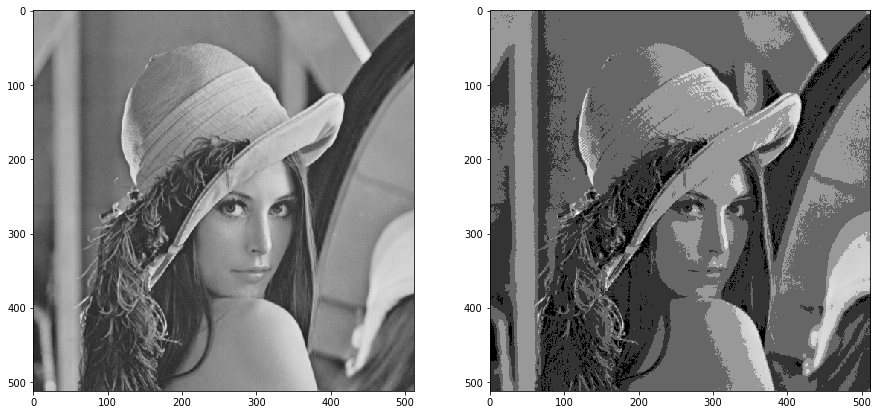

In [13]:
#graph-2
im = cv.imread('./images/lena.jpg', cv.IMREAD_GRAYSCALE)

res = np.empty(im.shape)

mask1 = pieceTransform(im, 0, 0, 0, imRange(0.2))
mask2 = pieceTransform(im, 0, imRange(0.2), imRange(0.2), imRange(0.4))
mask3 = pieceTransform(im, 0, imRange(0.4), imRange(0.4), imRange(0.6))
mask4 = pieceTransform(im, 0, imRange(0.6), imRange(0.6), imRange(0.8))
mask5 = pieceTransform(im, 0, imRange(0.8), imRange(0.8), imRange(255))

res = np.where(np.logical_and(im>=0, im<=imRange(0.2)) == True, mask1, res)
res = np.where(np.logical_and(im>=imRange(0.2), im<=imRange(0.4)) == True, mask2, res)
res = np.where(np.logical_and(im>=imRange(0.4), im<=imRange(0.6)) == True, mask3, res)
res = np.where(np.logical_and(im>=imRange(0.6), im<=imRange(0.8)) == True, mask4, res)
res = np.where(np.logical_and(im>=imRange(0.8), im<=255) == True, mask5, res)

_,plots = plt.subplots(1,2,figsize = (15,15))
plots[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)

plots[1].imshow(res, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()